<a href="https://colab.research.google.com/github/Sachin04t/Meat-the-Economy/blob/main/CS506_MeattheEconomy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()


Saving Consumption of meat per capita.csv to Consumption of meat per capita (1).csv
Saving GDP per capita PPP.csv to GDP per capita PPP.csv


In [4]:
gdp_df = pd.read_csv('GDP per capita PPP.csv')
gdp_df.head()

,Entity,Сontinent,Year,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,Asia,1990,NaN
1,Afghanistan,Asia,1991,NaN
2,Afghanistan,Asia,1992,NaN
3,Afghanistan,Asia,1993,NaN
4,Afghanistan,Asia,1994,NaN


In [5]:
meat_df = pd.read_csv('Consumption of meat per capita.csv')
meat_df.head()

,Entity,Year,Poultry,Beef,Sheep and goat,Pork,Other meats,Fish and seafood
0,Afghanistan,1961,0.641744,4.889479,8.332486,NaN,0.865845,0.030559
1,Afghanistan,1962,0.672726,5.106605,8.072717,NaN,0.896969,0.030578
2,Afghanistan,1963,0.673156,5.160862,8.251259,NaN,1.091328,0.030598
3,Afghanistan,1964,0.683714,5.132955,8.520909,NaN,1.030673,0.030614
4,Afghanistan,1965,0.714625,5.094256,8.820517,NaN,1.082147,0.030627


In [6]:
meat_columns = ['Poultry', 'Beef', 'Sheep and goat', 'Pork', 'Other meats', 'Fish and seafood']
meat_df['Meatball'] = meat_df[meat_columns].sum(axis = 1)

In [7]:
merged_df = pd.merge(meat_df, gdp_df, left_on=['Entity', 'Year'], right_on=["Entity", "Year"], how= "inner")
# Remove rows where GDP growth (your target) is NaN
merged_df_clean = merged_df.dropna(subset=['GDP per capita, PPP (constant 2017 international $)'])
merged_df = merged_df_clean
print(merged_df.head())

##########################################
#allows us to scroll throug columns of merged table#

# from google.colab import data_table
# data_table.DataTable(merged_df.head(100))  # Scrollable and interactive view
########################################
#shows us how mnay rows have missing gdp values#

# missing_count = merged_df['GDP per capita, PPP (constant 2017 international $)'].isna().sum()
# total_rows = merged_df.shape[0]
# print(f"Missing GDP values: {missing_count}")
# print(f"Total rows: {total_rows}")
# print(f"Percentage missing: {100 * missing_count / total_rows:.2f}%")



         Entity  Year   Poultry      Beef  Sheep and goat  Pork  Other meats  \
12  Afghanistan  2002  1.194718  7.147164        5.656409   NaN     0.496918   
13  Afghanistan  2003  1.265783  6.063511        5.369372   NaN     0.459357   
14  Afghanistan  2004  1.519444  6.414298        5.557698   NaN     0.469090   
15  Afghanistan  2005  2.271090  5.927240        5.468948   NaN     0.590687   
16  Afghanistan  2006  1.400274  4.764960        4.694443   NaN     0.443252   

    Fish and seafood   Meatball Сontinent  \
12          0.063436  14.558646      Asia   
13          0.061248  13.219272      Asia   
14          0.061186  14.021716      Asia   
15          0.061106  14.319072      Asia   
16          0.060443  11.363372      Asia   

    GDP per capita, PPP (constant 2017 international $)  
12                                          1280.4631    
13                                          1292.3335    
14                                          1260.0605    
15              

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X = merged_df[['Meatball']]
y = merged_df['GDP per capita, PPP (constant 2017 international $)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

R^2 Score: 0.5057405044993764


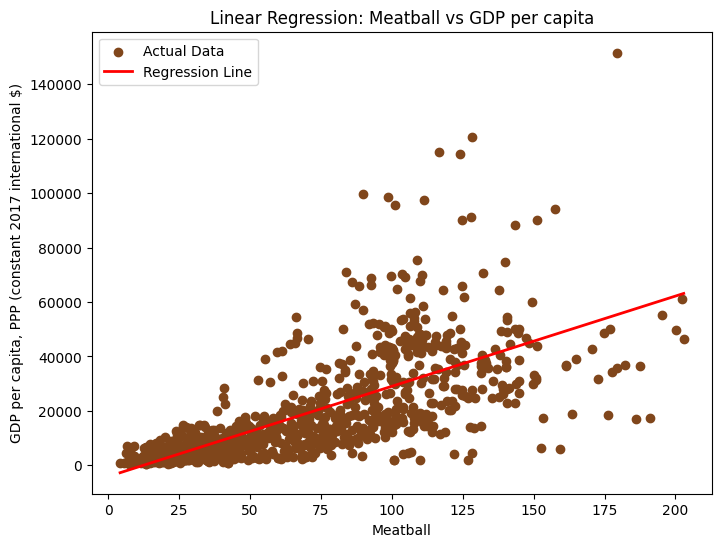

In [9]:
import matplotlib.pyplot as plt

X_test_flat = X_test.values.flatten()
sort_idx = np.argsort(X_test_flat)
X_test_sorted = X_test_flat[sort_idx]
y_pred_sorted = y_pred[sort_idx]

scatter_color = "#80461B"

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color=scatter_color, label='Actual Data' )
plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Meatball')
plt.ylabel('GDP per capita, PPP (constant 2017 international $)')
plt.title('Linear Regression: Meatball vs GDP per capita')
plt.legend()
plt.show()

In [10]:
#Check for an upward or downward trend in meatball growth per country
country_trends = {}

for country in merged_df['Entity'].unique():
    country_data = merged_df[merged_df['Entity'] == country]

    if len(country_data) < 5:  # Skip if too few data points
        continue

    X = country_data[['Year']]
    y = country_data['Meatball']

    model = LinearRegression()
    model.fit(X, y)

    slope = model.coef_[0]
    country_trends[country] = slope
    print(f"Slope for {country}: {slope}")

# trend_df = pd.DataFrame.from_dict(country_trends, orient='index', columns=['Meatball_Trend_Slope'])
# trend_df = trend_df.sort_values(by='Meatball_Trend_Slope', ascending=False)
# print(trend_df)


Slope for Afghanistan: -0.25277748266992484
Slope for Albania: 1.2296981266519436
Slope for Algeria: 0.10162528664882702
Slope for Angola: 0.8723027447067453
Slope for Antigua and Barbuda: 1.16612393310264
Slope for Argentina: 0.7413024925164956
Slope for Armenia: 1.867415946027141
Slope for Australia: 0.5014655408944286
Slope for Austria: -0.5819297454343844
Slope for Azerbaijan: 0.8834061929528362
Slope for Bahamas: 0.6030874176900662
Slope for Bangladesh: 0.7269882881917158
Slope for Barbados: 0.4274950294620603
Slope for Belarus: 1.2525122371390434
Slope for Belgium: -1.2281820477696217
Slope for Belize: 0.5571936991716462
Slope for Benin: 0.6953724654087247
Slope for Bermuda: -0.145393391097745
Slope for Bolivia: 1.6179610513599716
Slope for Bosnia and Herzegovina: 1.4082890878390808
Slope for Botswana: -0.2464569122525661
Slope for Brazil: 1.7196087154890036
Slope for Brunei: 0.6272296927323308
Slope for Bulgaria: 0.1603241236528593
Slope for Burkina Faso: 0.6023840120252935
Slop

R² for Poultry: 0.2709
R² for Beef: 0.2062
R² for Sheep and goat: 0.0279
R² for Pork: 0.4859
R² for Other meats: -0.0001
R² for Fish and seafood: 0.1376


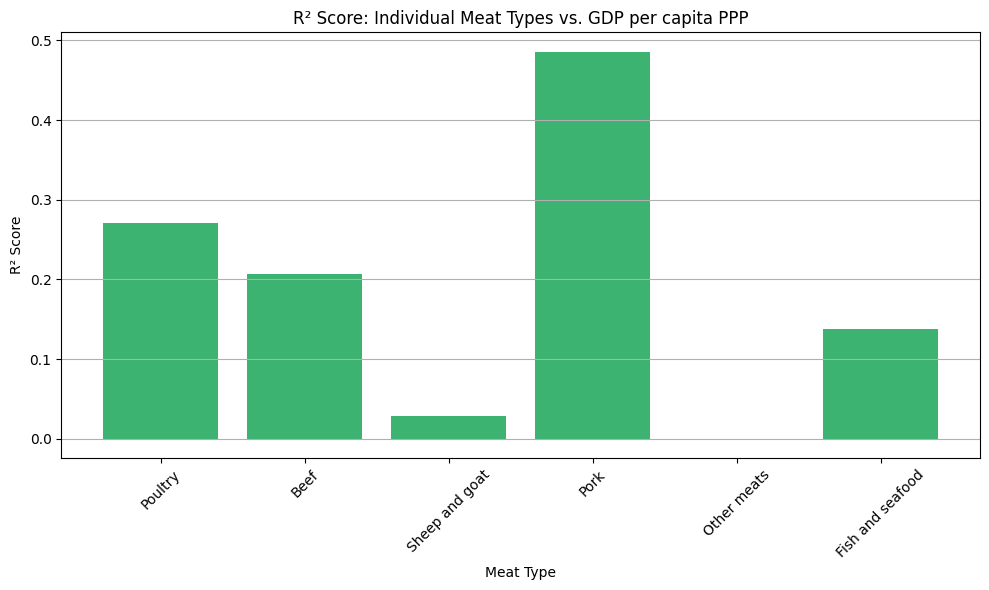

In [11]:
meat_types = ['Poultry', 'Beef', 'Sheep and goat', 'Pork', 'Other meats', 'Fish and seafood']
r2_scores = {}

y_full = merged_df['GDP per capita, PPP (constant 2017 international $)']

for meat in meat_types:
    X = merged_df[[meat]]
    y = y_full

    # Drop rows where this meat type or GDP is missing
    df = pd.concat([X, y], axis=1).dropna()
    X_clean = df[[meat]]
    y_clean = df['GDP per capita, PPP (constant 2017 international $)']

    X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores[meat] = r2

    print(f"R² for {meat}: {r2:.4f}")

# Plot R² results
plt.figure(figsize=(10, 6))
plt.bar(r2_scores.keys(), r2_scores.values(), color='mediumseagreen')
plt.title('R² Score: Individual Meat Types vs. GDP per capita PPP')
plt.ylabel('R² Score')
plt.xlabel('Meat Type')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [12]:
# weights
weights = {
    'Poultry': 0.27,
    'Beef': 0.20,
    'Sheep and goat': 0.03,
    'Pork': 0.49,
    'Other meats': 0.00,
    'Fish and seafood': 0.14
}

# Combine weights into a single feature
merged_df['WeightedMeatball'] = sum(merged_df[k] * w for k, w in weights.items())

# Keep only rows where both WeightedMeatball and GDP are NOT NaN
df_clean = merged_df[['WeightedMeatball', 'GDP per capita, PPP (constant 2017 international $)']].dropna()

X = df_clean[['WeightedMeatball']]
y = df_clean['GDP per capita, PPP (constant 2017 international $)']

# Train-test split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict & score
y_pred = model.predict(X_test)
weighted_r2 = r2_score(y_test, y_pred)

print(f"R² Score for Weighted Meatball: {weighted_r2:.4f}")


R² Score for Weighted Meatball: 0.5540


“While the original meatball score provided a general signal (R² ≈ 0.51), creating a weighted average based on individual meat type performance raised the model’s explanatory power to R² = 0.5545. This indicates that pork and poultry, for example, are more predictive of GDP levels than other meats like sheep or fish, and the model improves when this is reflected in the data representation.”

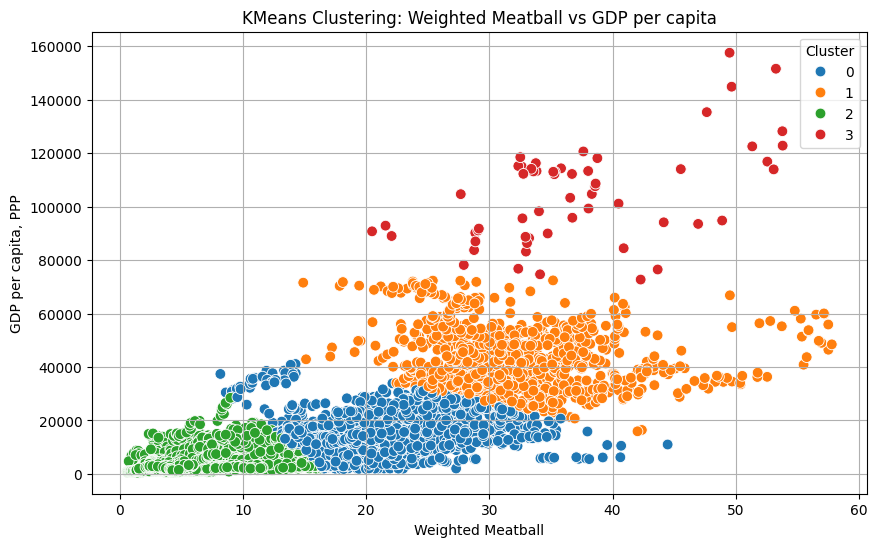

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# Select features
cluster_df = merged_df[['WeightedMeatball', 'GDP per capita, PPP (constant 2017 international $)']].dropna()

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_df)

# Run KMeans
kmeans = KMeans(n_clusters=4, random_state=42)  # You can play with n_clusters
cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels back to DataFrame
cluster_df['Cluster'] = cluster_labels

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=cluster_df['WeightedMeatball'],
    y=cluster_df['GDP per capita, PPP (constant 2017 international $)'],
    hue=cluster_df['Cluster'],
    palette='tab10',
    s=60
)
plt.title('KMeans Clustering: Weighted Meatball vs GDP per capita')
plt.xlabel('Weighted Meatball')
plt.ylabel('GDP per capita, PPP')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

KMeans clustering revealed four global country profiles based on GDP and weighted meat consumption. One cluster captured low-GDP, low-meatball nations, often limited by cultural or structural barriers to meat access. Another grouped developing economies with rising meat intake, signaling growing industrial food capacity. A third cluster highlighted wealthy, high-meatball countries with Western-style diets and strong agricultural infrastructure. Finally, a small elite cluster included extremely rich nations with high meat diversity, reflecting both affluence and globalized consumption.

In [14]:
# Merge cluster labels back to the original merged_df
merged_df_clustered = merged_df.copy()
merged_df_clustered = merged_df_clustered[['Entity', 'Year', 'WeightedMeatball', 'GDP per capita, PPP (constant 2017 international $)']].dropna()
merged_df_clustered['Cluster'] = cluster_labels

# Get example countries per cluster
sample_countries = merged_df_clustered.groupby('Cluster')['Entity'].unique().apply(lambda x: x[:5])  # show 5 per cluster

print(sample_countries)


Cluster
0    [Albania, Antigua and Barbuda, Argentina, Arme...
1    [Antigua and Barbuda, Australia, Austria, Baha...
2     [Afghanistan, Albania, Algeria, Angola, Armenia]
3         [Bermuda, Ireland, Luxembourg, Macao, Qatar]
Name: Entity, dtype: object


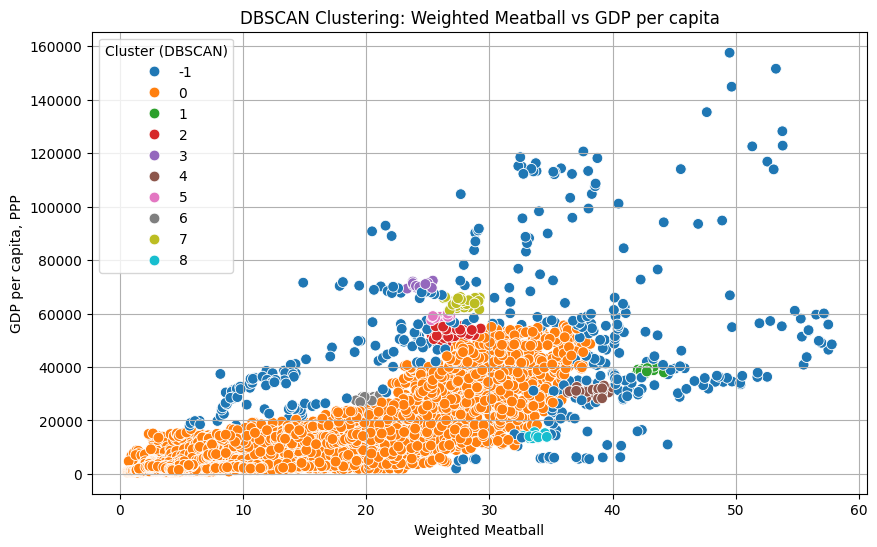

In [15]:
from sklearn.cluster import DBSCAN

# Prep features
cluster_df = merged_df[['WeightedMeatball', 'GDP per capita, PPP (constant 2017 international $)']].dropna()

# Standardize
scaler = StandardScaler()
scaled = scaler.fit_transform(cluster_df)

# Run DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=10)  # Try adjusting eps if needed
db_labels = dbscan.fit_predict(scaled)

# Add labels back to the DataFrame
cluster_df['DBSCAN_Cluster'] = db_labels

# Plot DBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=cluster_df['WeightedMeatball'],
    y=cluster_df['GDP per capita, PPP (constant 2017 international $)'],
    hue=cluster_df['DBSCAN_Cluster'],
    palette='tab10',
    s=60
)
plt.title('DBSCAN Clustering: Weighted Meatball vs GDP per capita')
plt.xlabel('Weighted Meatball')
plt.ylabel('GDP per capita, PPP')
plt.legend(title='Cluster (DBSCAN)')
plt.grid(True)
plt.show()


In [16]:
# Add DBSCAN labels to original merged_df
dbscan_labeled_df = merged_df[['Entity', 'Year', 'WeightedMeatball', 'GDP per capita, PPP (constant 2017 international $)']].dropna()
dbscan_labeled_df['DBSCAN_Cluster'] = db_labels

# See which countries are in each group
for cluster_id in sorted(dbscan_labeled_df['DBSCAN_Cluster'].unique()):
    sample = dbscan_labeled_df[dbscan_labeled_df['DBSCAN_Cluster'] == cluster_id]['Entity'].unique()[:5]
    print(f"Cluster {cluster_id}: {sample}")


Cluster -1: ['Antigua and Barbuda' 'Austria' 'Bahamas' 'Bahrain' 'Belgium']
Cluster 0: ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda']
Cluster 1: ['Austria' 'Denmark' 'Spain']
Cluster 2: ['Belgium' 'Denmark' 'Ireland' 'Netherlands' 'Norway']
Cluster 3: ['Brunei' 'Switzerland']
Cluster 4: ['Bahamas' 'Croatia' 'Poland' 'Portugal' 'Spain']
Cluster 5: ['Denmark' 'Norway' 'Switzerland']
Cluster 6: ['Israel' 'New Zealand' 'Panama' 'Slovakia' 'Trinidad and Tobago']
Cluster 7: ['Bermuda' 'Norway' 'Switzerland']
Cluster 8: ['Saint Lucia' 'Saint Vincent and the Grenadines']


In [17]:
cluster_summary = dbscan_labeled_df.groupby('DBSCAN_Cluster')[['WeightedMeatball', 'GDP per capita, PPP (constant 2017 international $)']].mean()
print(cluster_summary)

                WeightedMeatball  \
DBSCAN_Cluster                     
-1                     31.977980   
 0                     14.214909   
 1                     42.706913   
 2                     27.117416   
 3                     24.371558   
 4                     38.301198   
 5                     26.109001   
 6                     20.139658   
 7                     27.774050   
 8                     33.833811   

                GDP per capita, PPP (constant 2017 international $)  
DBSCAN_Cluster                                                       
-1                                                   49272.246374    
 0                                                   12869.137908    
 1                                                   38776.868000    
 2                                                   52755.860030    
 3                                                   70663.221250    
 4                                                   30753.688750    
 5     

DBSCAN revealed micro-communities of economic/meat behavior that KMeans blurred out — such as “rich but moderate meat” countries (Cluster 2) vs “rich and very meaty” (Cluster 1).

Small wealthy nations (e.g. Bermuda, Brunei) tend to form their own clusters — likely due to tourism, imports, or elite consumption patterns.

Cluster 0 represents the bulk of lower-to-middle income nations, reinforcing meat as a luxury signal in global food systems.

Meatball score still matters: countries with scores over 30 consistently map to higher GDP clusters or noise (elite states).

Meanwhile, the highest GDP countries with low meatball scores didn’t even cluster well — they were marked as outliers, reinforcing their uniqueness.

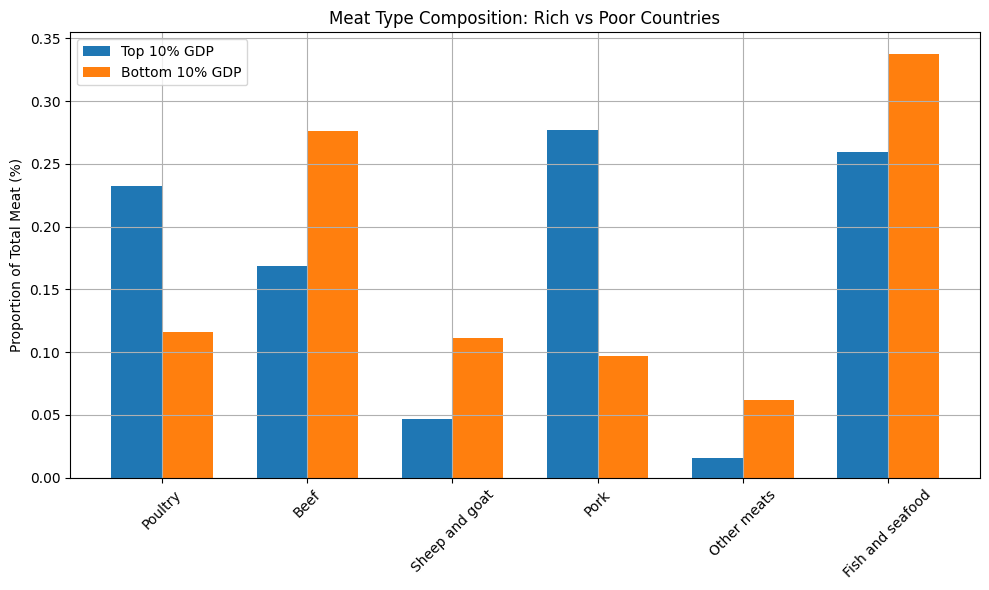

In [18]:
# Define meat columns
meat_columns = ['Poultry', 'Beef', 'Sheep and goat', 'Pork', 'Other meats', 'Fish and seafood']

# Compute latest GDP per country (average if multiple years)
gdp_avg = merged_df.groupby('Entity')['GDP per capita, PPP (constant 2017 international $)'].mean()

# Get top and bottom 10% of countries
num_countries = int(0.10 * len(gdp_avg))
top_countries = gdp_avg.sort_values(ascending=False).head(num_countries).index
bottom_countries = gdp_avg.sort_values(ascending=True).head(num_countries).index

# Compute average meat type consumption per group
top_meat = merged_df[merged_df['Entity'].isin(top_countries)][meat_columns].mean()
bottom_meat = merged_df[merged_df['Entity'].isin(bottom_countries)][meat_columns].mean()

# Normalize to percentages
top_meat_pct = top_meat / top_meat.sum()
bottom_meat_pct = bottom_meat / bottom_meat.sum()

# Plot
import matplotlib.pyplot as plt
import numpy as np

labels = meat_columns
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, top_meat_pct, width, label='Top 10% GDP')
bars2 = ax.bar(x + width/2, bottom_meat_pct, width, label='Bottom 10% GDP')

ax.set_ylabel('Proportion of Total Meat (%)')
ax.set_title('Meat Type Composition: Rich vs Poor Countries')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


While wealthier nations consume more meat overall, their diet composition is also distinct. Richer countries lean heavily on pork and poultry — meats typically associated with industrial farming and Westernized dietary patterns — while poorer countries consume more beef, goat, and fish, likely driven by regional availability, cultural practices, and economic access.

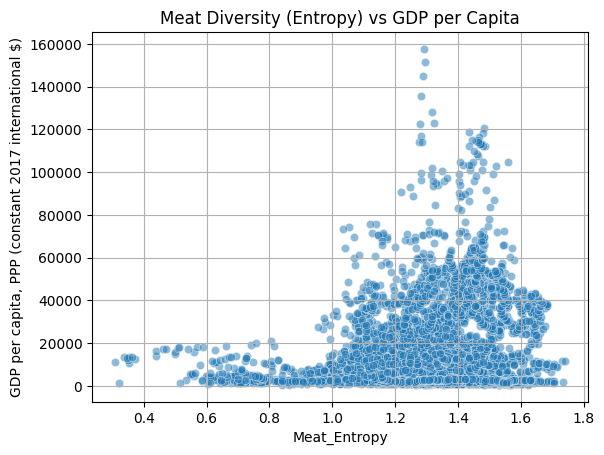

In [19]:
from scipy.stats import entropy

# Calculate entropy for each country-year
meat_columns = ['Poultry', 'Beef', 'Sheep and goat', 'Pork', 'Other meats', 'Fish and seafood']

# Normalize meat columns per row to get proportion
meat_props = merged_df[meat_columns].div(merged_df[meat_columns].sum(axis=1), axis=0)

# Calculate entropy for each row
merged_df['Meat_Entropy'] = meat_props.apply(lambda x: entropy(x.dropna()), axis=1)

# Plot: Meat Entropy vs GDP
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=merged_df, x='Meat_Entropy', y='GDP per capita, PPP (constant 2017 international $)', alpha=0.5)
plt.title("Meat Diversity (Entropy) vs GDP per Capita")
plt.grid(True)
plt.show()


This entropy-based analysis suggests that dietary diversity may serve as a proxy for a country's position in the globalized economy. Nations with limited meat variety appear structurally constrained (**by geography, religion, or supply chains**) while those with higher entropy demonstrate the logistical and cultural infrastructure of developed economies.

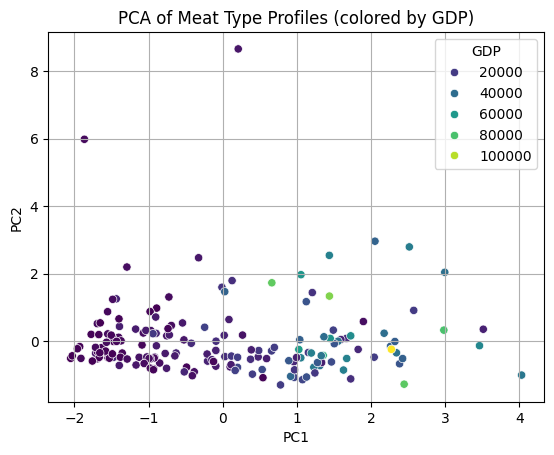

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Get latest average per country
latest_meat = merged_df.groupby('Entity')[meat_columns].mean().dropna()

# Normalize
scaled = StandardScaler().fit_transform(latest_meat)

# PCA to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

# Build DataFrame
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=latest_meat.index)
pca_df['GDP'] = merged_df.groupby('Entity')['GDP per capita, PPP (constant 2017 international $)'].mean()

# Plot
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='GDP', palette='viridis')
plt.title("PCA of Meat Type Profiles (colored by GDP)")
plt.grid(True)
plt.show()


PCA reveals that meat consumption profiles are not randomly distributed. Instead, GDP stratifies countries along a dietary axis dominated by pork and poultry. This suggests that economic growth is often accompanied by dietary convergence (toward a Westernized, industrial meat standard) potentially at the expense of cultural diversity.

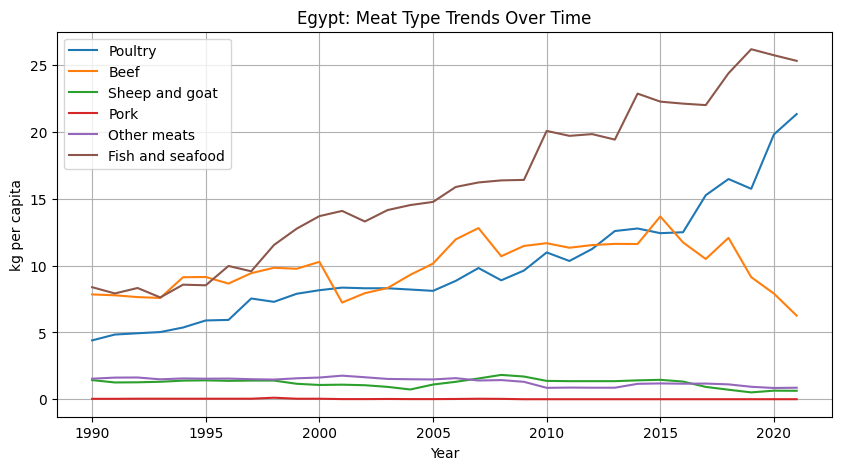

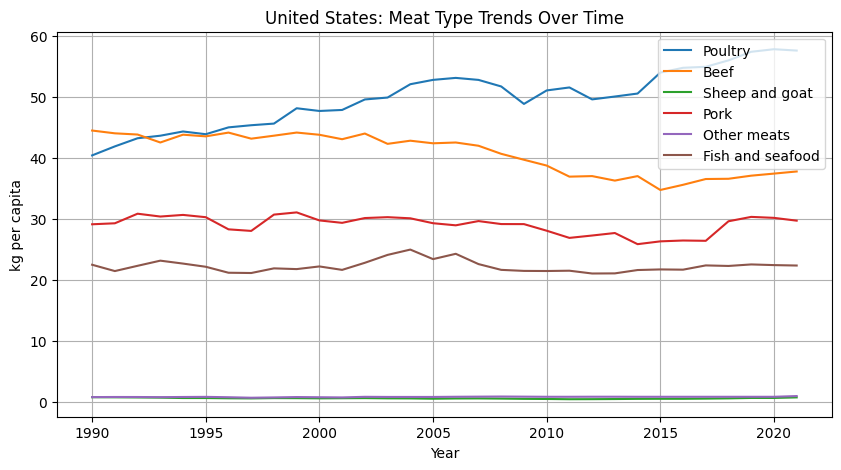

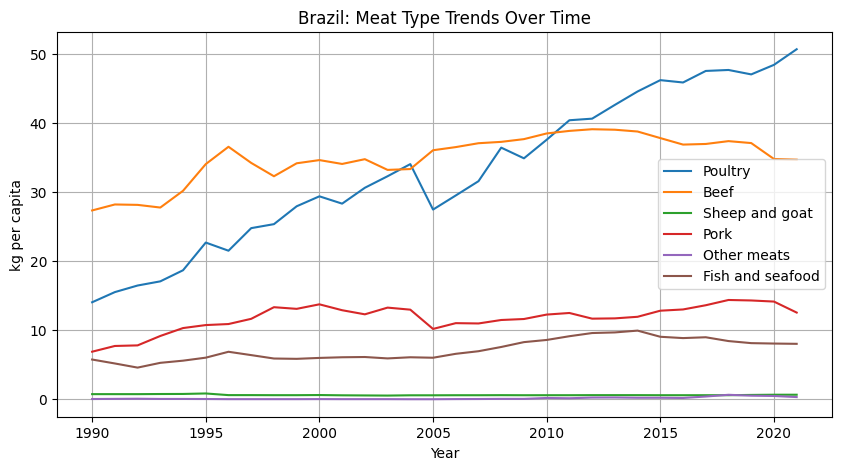

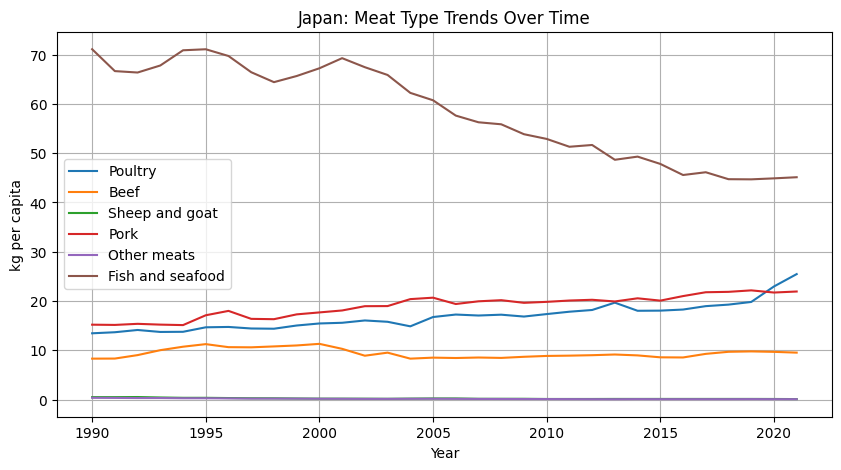

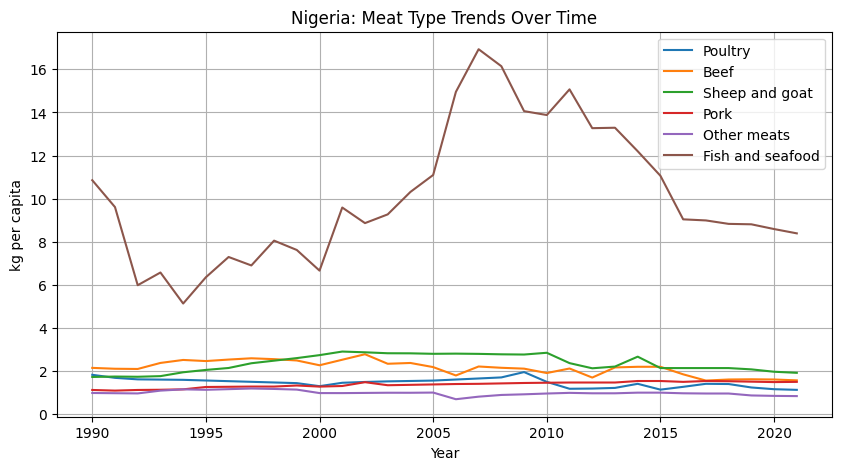

In [21]:
# Pick a few interesting countries to study
countries = ['Egypt', 'United States', 'Brazil', 'Japan', 'Nigeria']
for country in countries:
    df = merged_df[merged_df['Entity'] == country].sort_values('Year')
    df[meat_columns].set_index(df['Year']).plot(figsize=(10,5), title=f"{country}: Meat Type Trends Over Time")
    plt.ylabel("kg per capita")
    plt.grid(True)
    plt.show()

- Egypt’s meat evolution reflects an economically responsive, religiously bound system: high fish suggests coastal dependence, rising poultry signals industrialization.

- The US shows what happens after dietary industrialization peaks — poultry optimization, beef retreat, and little cultural incentive to diversify

- Brazil exemplifies the economic transition pathway: from cattle dominance → poultry surge → slight dietary diversification.

- Japan proves that you can develop economically while retaining cultural dietary roots — meat diversification here is measured, not disruptive.

- Nigeria reflects a resource-dependent diet vulnerable to shocks (climate, imports, conflict). Low meat diversity = food system fragility.

This shows...
- Poultry is the first industrial step as countries develop
- Beef shrinks as economies mature or costs rise
- Fish is versatile: cultural in Japan, fallback in Nigeria, trade-driven in Egypt
- Pork only thrives where religion allows it
- Meat transitions are not linear — they reflect identity, geography, and infrastructure

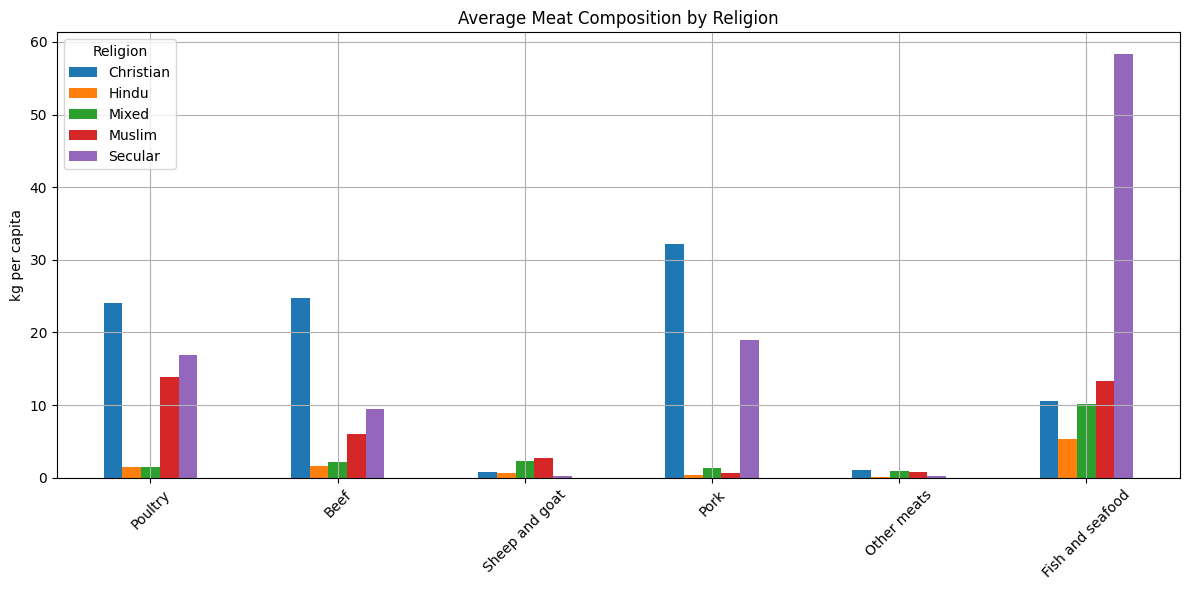

In [22]:
# Sample religion labels
religion_map = {
    'India': 'Hindu',
    'Pakistan': 'Muslim',
    'USA': 'Christian',
    'Brazil': 'Christian',
    'Egypt': 'Muslim',
    'Japan': 'Secular',
    'Indonesia': 'Muslim',
    'Nigeria': 'Mixed',
    'Germany': 'Christian',
    'Saudi Arabia': 'Muslim',
}

# Add religion column
merged_df['Religion'] = merged_df['Entity'].map(religion_map)

# Average meat types per religion
religion_meat = merged_df.groupby('Religion')[meat_columns].mean()

# Plot
religion_meat.T.plot(kind='bar', figsize=(12,6))
plt.title("Average Meat Composition by Religion")
plt.ylabel("kg per capita")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


The structure of meat consumption across countries reflects long-standing religious taboos, philosophical values, and substitution strategies. Secular and Christian-majority nations tend toward industrial meat diversity, while Muslim and Hindu populations shape diets through prohibitions and adaptations, often reinforcing regional protein alternatives like fish, goat, or poultry.

R^2 Score: 0.9947286920285141
RMSE: 1422.8991966523777


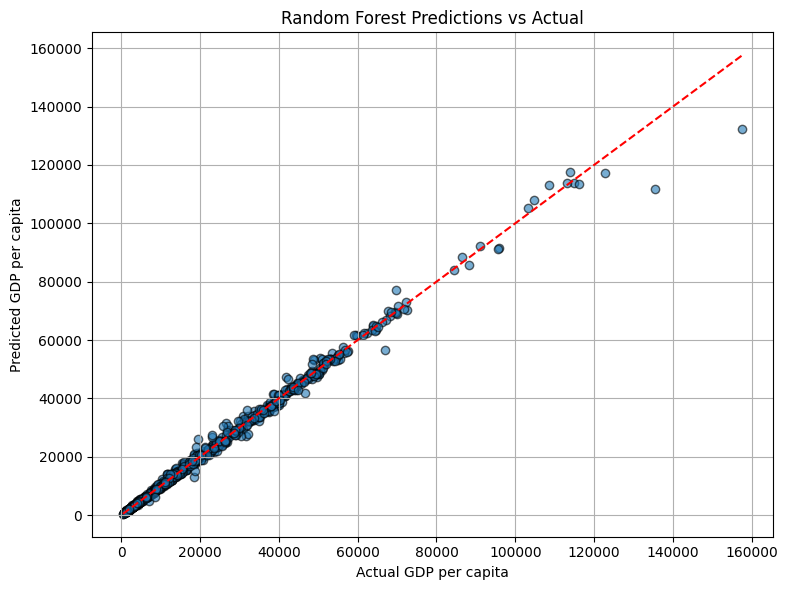

 93%|=================== | 1113/1192 [00:11<00:00]       

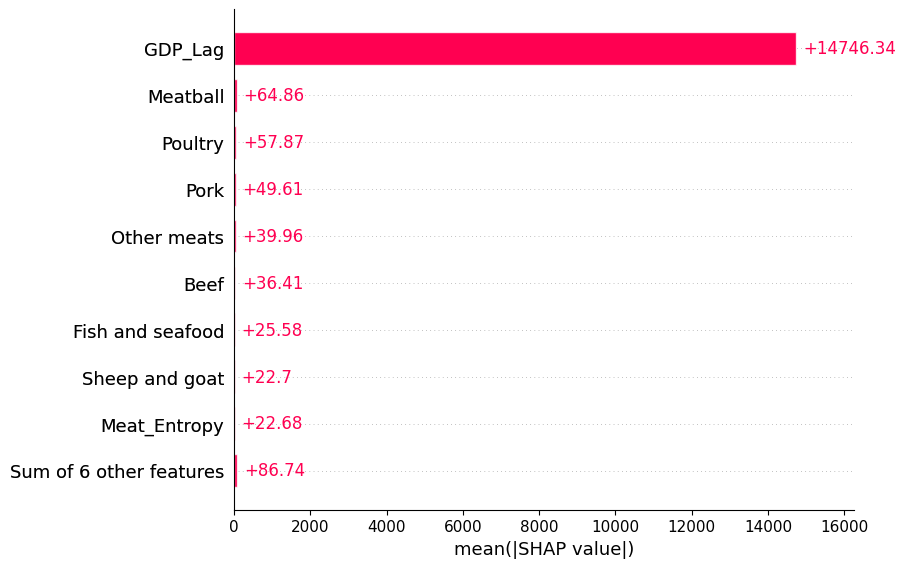

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import shap

# Assume merged_df has been created with raw meat and GDP data
meat_columns = ['Poultry', 'Beef', 'Sheep and goat', 'Pork', 'Other meats', 'Fish and seafood']

# Create GDP lag feature
merged_df['GDP_Lag'] = merged_df.groupby('Entity')['GDP per capita, PPP (constant 2017 international $)'].shift(1)

# Compute trend slopes for meat consumption per country
temp_df = merged_df.copy()
for meat in meat_columns:
    trend_col = f"{meat}_trend"
    temp_df[trend_col] = np.nan
    for country in temp_df['Entity'].unique():
        country_data = temp_df[temp_df['Entity'] == country]
        if len(country_data) >= 5:
            slope = np.polyfit(country_data['Year'], country_data[meat], 1)[0]
            temp_df.loc[temp_df['Entity'] == country, trend_col] = slope
merged_df = temp_df.copy()

# Also ensure entropy is defined
from scipy.stats import entropy
meat_props = merged_df[meat_columns].div(merged_df[meat_columns].sum(axis=1), axis=0)
merged_df['Meat_Entropy'] = meat_props.apply(lambda x: entropy(x.dropna()), axis=1)

# Build feature list and training data
all_trend_cols = [f"{meat}_trend" for meat in meat_columns]
feature_cols = meat_columns + ['Meatball', 'Meat_Entropy', 'GDP_Lag'] + all_trend_cols

features = merged_df[feature_cols]
target = merged_df['GDP per capita, PPP (constant 2017 international $)']
valid_rows = features.dropna().index
X = features.loc[valid_rows]
y = target.loc[valid_rows]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train Random Forest
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("R^2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Plot predicted vs actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual GDP per capita')
plt.ylabel('Predicted GDP per capita')
plt.title('Random Forest Predictions vs Actual')
plt.grid(True)
plt.tight_layout()
plt.show()

# Explain model
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)
shap.plots.bar(shap_values)


red dashed line = perfect predictions; predicted GDP exactly equals actual GDP

on the line = model predicted accurately
below = unpredicted
above - overpredicted